
# (TMDB): Movie Database Analysis
## Table of Content:

- Introduction
- Exploratory Data Analysis
- Data Wrangling
- Data Cleansing 
- Conclusions

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

**Notes:**  
Certain columns like: ‘cast’ , ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

**column names:** 
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj



### Questions for Analysis


>**Who is the actor with most movies?**

>**Who is the director with most movies?**

>**Who is the actor that makes the most money?**

>**Who is the director that makes the most money?**

>**Which genres are most popular from year to year?**



In [1]:
# All used packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Function to split columns containing several values.
def spl(df,split_c,y):
    
    new_df = pd.DataFrame()
    
# apply split function to each column 
    for c in split_c:
        df_s = df[c].str.split(y, expand=True)
        
# Rename new columns
        df_s = df_s.add_prefix(c)
        
# merge new columns
        new_df = new_df.merge(df_s, how='outer' , left_index=True, right_index=True)
    
# Remove old columns (that containing several values)
    df=df.drop(split_c,axis=1)

# merge new columns with dataframe
    new_df = df.merge(new_df, how='outer' , left_index=True, right_index=True)

    return(new_df)

In [3]:
# Function to combine multiple columns into different shapes.

def comp( dataframe , multiple_columns , compare_with):
    
    a = multiple_columns
    b = compare_with
    x = dataframe

    d_a = x.loc[:,a]
    d_b = x.loc[:,[b]]


    df_m = d_b.merge( d_a, how='outer' , left_index=True, right_index=True)
    df_m = df_m.set_index(b)

    df_s = df_m.stack()
    df_s = pd.DataFrame(df_s)
    


    df_m
    df_f = df_m[a[0]]
    k = a[1:]
    for n in k:
        df_f = df_f.append(df_m[n])
    df_f = pd.DataFrame(df_f)
    return(df_s , df_f)


## Data Wrangling


### General Properties


In [4]:
# Load data
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
df.shape

(10866, 21)

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [11]:
df.isnull().sum(1).sum()

13434

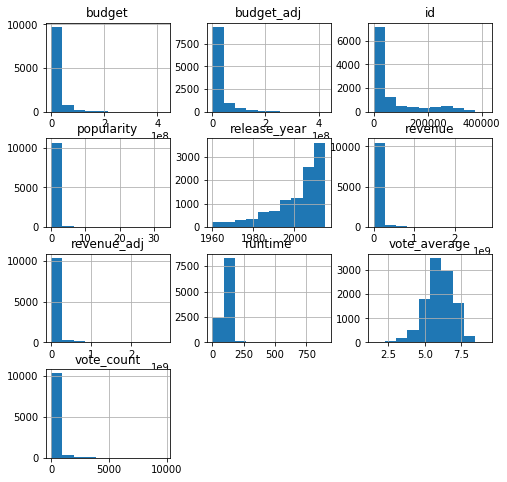

In [12]:
df.hist(figsize=(8,8));

<a id='wrangling'></a>

### observation:

>1. There are many columns need to be removed as they are not important for our analysis.
    <ul>
    <li>id
    <li>imdb_id
    <li>homepage
    <li>tagline
    <li>keywords
    <li>overview
    <li>release_date
</ul>

>2. There is one duplicated row need to dropped.

>3. There are many rows with NaN values need to dropped.

>4. There are many 0 values found in the histograms and this will affect the analysis results, so we need to drop any row with 0 values.

>5. There are many columns containing several values, which are seperated by an "|",so we need to split them.
    <ul>
    <li>cast
    <li>director
    <li>keywords
    <li>genres
    <li>production_companies
</ul>





### Data Cleansing

 

In [13]:
# Remove non-important columns

df=df.drop(['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'overview','release_date'],axis=1)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
# Remove duplicated rows.

df=df.drop(df[df.duplicated()].index)
df.duplicated().sum()

0

In [15]:
# Remove rows with null values.
df=df.dropna()
df.isnull().sum(1).sum()

0

In [16]:
# Remove rows with 0 values.
df=df[df!=0]
df=df.dropna()
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [17]:
# Apply split function:

df_n=spl( df ,  ['cast', 'genres', 'production_companies'] , '|')
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 26 columns):
popularity               3805 non-null float64
budget                   3805 non-null float64
revenue                  3805 non-null float64
original_title           3805 non-null object
director                 3805 non-null object
runtime                  3805 non-null float64
vote_count               3805 non-null int64
vote_average             3805 non-null float64
release_year             3805 non-null int64
budget_adj               3805 non-null float64
revenue_adj              3805 non-null float64
cast0                    3805 non-null object
cast1                    3802 non-null object
cast2                    3802 non-null object
cast3                    3794 non-null object
cast4                    3776 non-null object
genres0                  3805 non-null object
genres1                  3169 non-null object
genres2                  2089 non-null object
genres3      

## Answering Questions 


### Q1 Who is the actor with most movies?


In [18]:
# Apply combine Function to combine multiple columns into different shapes.

a,b = comp( df_n , ['cast0', 'cast1', 'cast2', 'cast3', 'cast4'] , 'original_title')

In [19]:
# Fast look
a

0
original_title                                             
Jurassic World                  cast0           Chris Pratt
                                cast1   Bryce Dallas Howard
                                cast2           Irrfan Khan
                                cast3     Vincent D'Onofrio
                                cast4         Nick Robinson
Mad Max: Fury Road              cast0             Tom Hardy
                                cast1       Charlize Theron
                                cast2      Hugh Keays-Byrne
                                cast3        Nicholas Hoult
                                cast4           Josh Helman
Insurgent                       cast0      Shailene Woodley
                                cast1            Theo James
                                cast2          Kate Winslet
                                cast3          Ansel Elgort
                                cast4          Miles Teller
Star Wars: The Force Awakens    cast0         Harrison Ford
                                cast1           Mark Hamill
                                cast2         Carrie Fisher
                                cast3           Adam Driver
                                cast4          Daisy Ridley
Furious 7                       cast0            Vin Diesel
                                cast1           Paul Walker
                                cast2         Jason Statham
                                cast3    Michelle Rodriguez
                                cast4        Dwayne Johnson
The Revenant                    cast0     Leonardo DiCaprio
                                cast1             Tom Hardy
                                cast2          Will Poulter
                                cast3      Domhnall Gleeson
                                cast4         Paul Anderson
...                                                     ...
Watership Down                  cast0             John Hurt
                                cast1        Richard Briers
                                cast2    Michael Graham Cox
                                cast3          John Bennett
                                cast4          Simon Cadell
Who's Afraid of Virginia Woolf? cast0      Elizabeth Taylor
                                cast1        Richard Burton
                                cast2          George Segal
                                cast3          Sandy Dennis
                                cast4        Agnes Flanagan
Torn Curtain                    cast0           Paul Newman
                                cast1         Julie Andrews
                                cast2          Lila Kedrova
                                cast3       HansjÃ¶rg Felmy
                                cast4      Tamara Toumanova
El Dorado                       cast0            John Wayne
                                cast1        Robert Mitchum
                                cast2            James Caan
                                cast3         Charlene Holt
                                cast4              Paul Fix
The Sand Pebbles                cast0         Steve McQueen
                                cast1  Richard Attenborough
                                cast2        Richard Crenna
                                cast3        Candice Bergen
                                cast4      Emmanuelle Arsan
Fantastic Voyage                cast0          Stephen Boyd
                                cast1          Raquel Welch
                                cast2        Edmond O'Brien
                                cast3      Donald Pleasence
                                cast4      Arthur O'Connell

[18979 rows x 1 columns]

In [20]:
# The answer:
b[0].value_counts().sort_values(ascending=False).head(1)

Robert De Niro    52
Name: 0, dtype: int64

In [21]:
# The top 20:
T_act = b[0].value_counts().sort_values(ascending=False).head(20)
T_act

Robert De Niro           52
Bruce Willis             46
Samuel L. Jackson        44
Nicolas Cage             43
Matt Damon               36
Johnny Depp              35
Morgan Freeman           34
Brad Pitt                34
Tom Hanks                34
Harrison Ford            34
Sylvester Stallone       34
Tom Cruise               33
Eddie Murphy             32
Denzel Washington        32
Liam Neeson              31
Julianne Moore           30
Owen Wilson              30
Arnold Schwarzenegger    29
Robin Williams           29
Meryl Streep             29
Name: 0, dtype: int64

Text(0,0.5,'Number of movies')

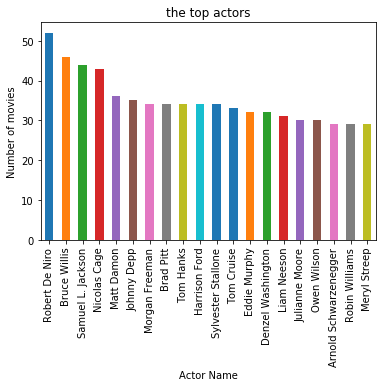

In [22]:
# visualization to the top 20 actors using Bar Charts:

T_act.plot(kind="bar")
plt.title("the top actors")
plt.xlabel("Actor Name")
plt.ylabel("Number of movies")

It's concluded that the No. of the first four actors' movies are relatively higher than the rest.

### Q2 Who is the director with most movies?


In [23]:
# Apply combine Function.

a,b = comp( df_n , ['director'] , 'original_title')

In [24]:
# Fast look
a

,,0
original_title,,
Jurassic World,director,Colin Trevorrow
Mad Max: Fury Road,director,George Miller
Insurgent,director,Robert Schwentke
Star Wars: The Force Awakens,director,J.J. Abrams
Furious 7,director,James Wan
The Revenant,director,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
Terminator Genisys,director,Alan Taylor
The Martian,director,Ridley Scott
Minions,director,Kyle Balda|Pierre Coffin


In [25]:
# The answer:
b.iloc[:,0].value_counts().sort_values(ascending=False).head(1)

Steven Spielberg    27
Name: director, dtype: int64

In [26]:
# The top 20:
T_act = b.iloc[:,0].value_counts().sort_values(ascending=False).head(20)
T_act

Steven Spielberg        27
Clint Eastwood          24
Ridley Scott            21
Woody Allen             18
Martin Scorsese         17
Steven Soderbergh       17
Tim Burton              16
Oliver Stone            15
Renny Harlin            15
Brian De Palma          15
Robert Zemeckis         15
Wes Craven              14
Joel Schumacher         14
Tony Scott              14
Ron Howard              14
Francis Ford Coppola    13
Richard Donner          13
Robert Rodriguez        12
Barry Levinson          12
Rob Reiner              12
Name: director, dtype: int64

Text(0,0.5,'Number of movies')

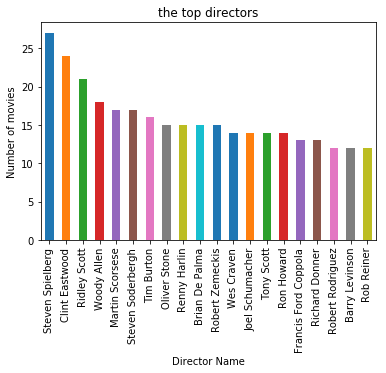

In [27]:
# visualization to the top 20 directors using Bar Charts:

T_act.plot(kind="bar")
plt.title("the top directors")
plt.xlabel("Director Name")
plt.ylabel("Number of movies")

It's concluded that the No. of the first three directors' movies are relatively higher than the rest.

### Q3 Who is the actor that makes the most money?


In [28]:
# Apply combine Function to combine multiple columns into different shapes.

a,b = comp( df_n , ['cast0', 'cast1', 'cast2', 'cast3', 'cast4'] , 'revenue_adj')

In [29]:
# Fast look

b.columns =['Actors']
b=b.reset_index()
l=b.groupby(by='Actors').sum()
l.iloc[:,0].sort_values(ascending=False)

Actors
Harrison Ford                1.428570e+10
Tom Cruise                   1.117507e+10
Tom Hanks                    1.043351e+10
Emma Watson                  8.790080e+09
Ian McKellen                 8.628837e+09
Johnny Depp                  8.518033e+09
Daniel Radcliffe             8.515082e+09
Eddie Murphy                 8.403307e+09
Rupert Grint                 8.358341e+09
Bruce Willis                 8.236476e+09
Samuel L. Jackson            7.948471e+09
Cameron Diaz                 7.836254e+09
Will Smith                   7.775643e+09
Carrie Fisher                7.678282e+09
Ralph Fiennes                7.591763e+09
Brad Pitt                    7.546207e+09
Orlando Bloom                7.467078e+09
Sean Connery                 7.407260e+09
Mark Hamill                  7.379360e+09
Leonardo DiCaprio            7.226350e+09
Gary Oldman                  7.116634e+09
Robert Downey Jr.            7.051118e+09
Robin Williams               6.963477e+09
Sandra Bullock             

In [30]:
# The answer:
l.iloc[:,0].sort_values(ascending=False).head(1)

Actors
Harrison Ford    1.428570e+10
Name: revenue_adj, dtype: float64

In [31]:
# The top 20:
T_act = l.iloc[:,0].sort_values(ascending=False).head(20)
T_act

Actors
Harrison Ford        1.428570e+10
Tom Cruise           1.117507e+10
Tom Hanks            1.043351e+10
Emma Watson          8.790080e+09
Ian McKellen         8.628837e+09
Johnny Depp          8.518033e+09
Daniel Radcliffe     8.515082e+09
Eddie Murphy         8.403307e+09
Rupert Grint         8.358341e+09
Bruce Willis         8.236476e+09
Samuel L. Jackson    7.948471e+09
Cameron Diaz         7.836254e+09
Will Smith           7.775643e+09
Carrie Fisher        7.678282e+09
Ralph Fiennes        7.591763e+09
Brad Pitt            7.546207e+09
Orlando Bloom        7.467078e+09
Sean Connery         7.407260e+09
Mark Hamill          7.379360e+09
Leonardo DiCaprio    7.226350e+09
Name: revenue_adj, dtype: float64

Text(0,0.5,'Revenue')

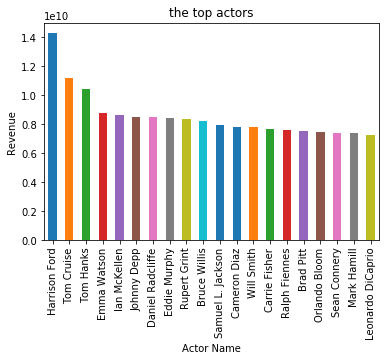

In [32]:
# visualization to the top 20 actors using Bar Charts:

T_act.plot(kind="bar")
plt.title("the top actors")
plt.xlabel("Actor Name")
plt.ylabel("Revenue")

We can see that there is a huge difference between the first actor compared to the rest of the actors: The first actor earns a lot more than the other actors.

### Q4 Who is the director that makes the most money?


In [33]:
# Apply combine Function.

a,b = comp( df_n ,  ['director'] , 'revenue_adj')

In [34]:
# Fast look

b.columns =['Director']
b=b.reset_index()
l=b.groupby(by='Director').sum()
l.iloc[:,0].sort_values(ascending=False)

Director
Steven Spielberg                1.520245e+10
James Cameron                   7.327221e+09
Peter Jackson                   7.019848e+09
George Lucas                    6.313919e+09
Robert Zemeckis                 5.655648e+09
Michael Bay                     5.460672e+09
Chris Columbus                  4.893486e+09
Tim Burton                      4.529285e+09
David Yates                     4.177455e+09
Christopher Nolan               4.164262e+09
Ridley Scott                    4.141848e+09
Roland Emmerich                 4.076981e+09
Ron Howard                      4.011669e+09
Gore Verbinski                  3.926130e+09
Sam Raimi                       3.595782e+09
Clint Eastwood                  3.518207e+09
J.J. Abrams                     3.414677e+09
Richard Donner                  3.242881e+09
Tony Scott                      3.117253e+09
Francis Lawrence                3.067993e+09
M. Night Shyamalan              2.834729e+09
Barry Sonnenfeld                2.812794e+09
J

In [35]:
# The answer:
l.iloc[:,0].sort_values(ascending=False).head(1)

Director
Steven Spielberg    1.520245e+10
Name: revenue_adj, dtype: float64

In [36]:
# The top 20:
T_act = l.iloc[:,0].sort_values(ascending=False).head(20)
T_act

Director
Steven Spielberg     1.520245e+10
James Cameron        7.327221e+09
Peter Jackson        7.019848e+09
George Lucas         6.313919e+09
Robert Zemeckis      5.655648e+09
Michael Bay          5.460672e+09
Chris Columbus       4.893486e+09
Tim Burton           4.529285e+09
David Yates          4.177455e+09
Christopher Nolan    4.164262e+09
Ridley Scott         4.141848e+09
Roland Emmerich      4.076981e+09
Ron Howard           4.011669e+09
Gore Verbinski       3.926130e+09
Sam Raimi            3.595782e+09
Clint Eastwood       3.518207e+09
J.J. Abrams          3.414677e+09
Richard Donner       3.242881e+09
Tony Scott           3.117253e+09
Francis Lawrence     3.067993e+09
Name: revenue_adj, dtype: float64

Text(0,0.5,'Revenue')

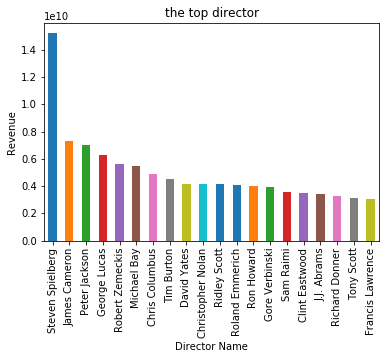

In [37]:
# visualization to the top 20 actors using Bar Charts:

T_act.plot(kind="bar");
plt.title("the top director")
plt.xlabel("Director Name")
plt.ylabel("Revenue")

We can see that there is a huge difference between the first director compared to the rest of the directors: The first director earns a lot more than the others.

### Q5 Which genres are most popular from year to year?

#### Q5.1 Which genres are most (in general)?

In [38]:
# Apply combine Function to combine multiple columns into different shapes.

a,b = comp( df_n , ['genres0', 'genres1', 'genres2', 'genres3', 'genres4'] , 'release_year')

In [39]:
# Fast look
a

0
release_year                         
2015         genres0           Action
             genres1        Adventure
             genres2  Science Fiction
             genres3         Thriller
             genres0           Action
             genres1        Adventure
             genres2  Science Fiction
             genres3         Thriller
             genres0        Adventure
             genres1  Science Fiction
             genres2         Thriller
             genres0           Action
             genres1        Adventure
             genres2  Science Fiction
             genres3          Fantasy
             genres0           Action
             genres1            Crime
             genres2         Thriller
             genres0          Western
             genres1            Drama
             genres2        Adventure
             genres3         Thriller
             genres0  Science Fiction
             genres1           Action
             genres2         Thriller
             genres3        Adventure
             genres0            Drama
             genres1        Adventure
             genres2  Science Fiction
             genres0           Family
...                               ...
1978         genres1           Comedy
             genres2            Drama
             genres0           Horror
             genres1         Thriller
             genres2  Science Fiction
             genres3          Mystery
             genres0        Adventure
             genres1           Family
             genres2          Fantasy
             genres3            Music
             genres4  Science Fiction
             genres0           Action
             genres1            Drama
             genres2           Horror
             genres3         Thriller
             genres0        Adventure
             genres1        Animation
             genres2            Drama
1966         genres0            Drama
             genres0          Mystery
             genres1         Thriller
             genres0           Action
             genres1          Western
             genres0           Action
             genres1        Adventure
             genres2            Drama
             genres3              War
             genres4          Romance
             genres0        Adventure
             genres1  Science Fiction

[10180 rows x 1 columns]

In [40]:
# The answer:
b[0].value_counts().sort_values(ascending=False).head(1)

Drama    1729
Name: 0, dtype: int64

In [41]:
# The top 20:
T_act = b[0].value_counts().sort_values(ascending=False).head(20)
T_act

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: 0, dtype: int64

Text(0,0.5,'Number of movies')

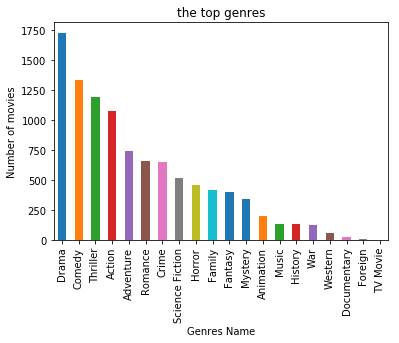

In [42]:
# visualization to the top 20 actors using Bar Charts:

T_act.plot(kind="bar")
plt.title("the top genres")
plt.xlabel("Genres Name")
plt.ylabel("Number of movies")

 It's concluded that the No. of the first four genres are relatively higher than the rest. And "Drama" is the most popular with relatively large difference.




#### Q5.2  Which genres are most popular from year to year?

In [43]:
b.columns =['Genres']
b=b.reset_index()
b["Y_G"] = b["release_year"].astype(str) + "_" + b["Genres"]
b.head()

,release_year,Genres,Y_G
0,2015,Action,2015_Action
1,2015,Action,2015_Action
2,2015,Adventure,2015_Adventure
3,2015,Action,2015_Action
4,2015,Action,2015_Action


In [44]:
T_act = b.iloc[:,2].value_counts()
T_act = pd.DataFrame(T_act)
T_act = T_act.reset_index()


In [45]:
T_act.columns=['Y_G','N']
T = T_act['Y_G'].str.split('_', expand=True)
T.columns=['release_year','Genres']
T['N'] = T_act['N']
t = T.sort_values(by = 'release_year')
df = t.reset_index( drop = True )
#df = t.set_index(['release_year'])
#df = df.transpose()

df

,release_year,Genres,N
0,1960,Romance,2
1,1960,History,1
2,1960,Action,2
3,1960,Horror,1
4,1960,Thriller,1
5,1960,Comedy,2
6,1960,Adventure,1
7,1960,Drama,3
8,1960,Western,1
9,1961,Adventure,2


In [46]:
df = df.pivot(index = 'release_year' , columns = 'Genres' , values = 'N' )

Text(0,0.5,'Number of movies')

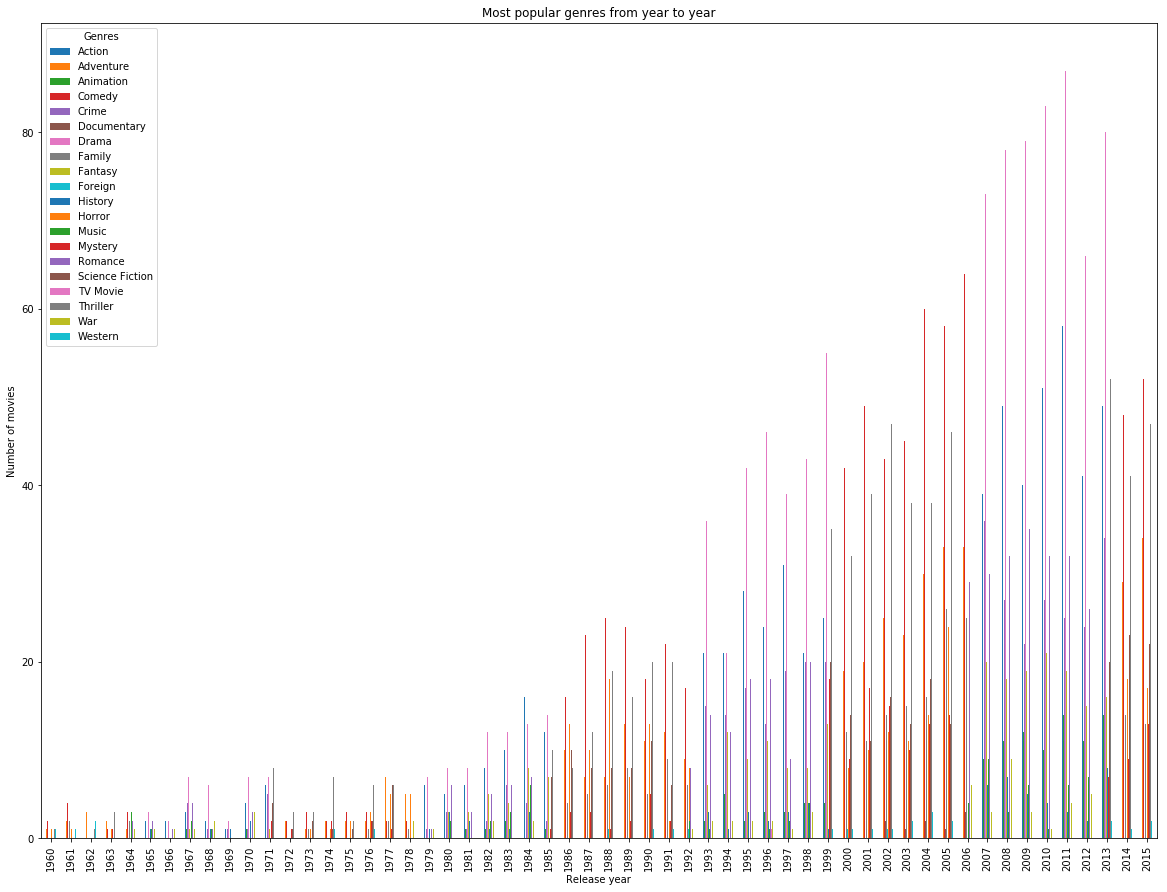

In [47]:
df.plot(kind="bar" , figsize = (20,15));
plt.title("Most popular genres from year to year")
plt.xlabel("Release year")
plt.ylabel("Number of movies")

It's concluded that almost all genres popularity increasing by time.

Text(0,0.5,'Number of movies')

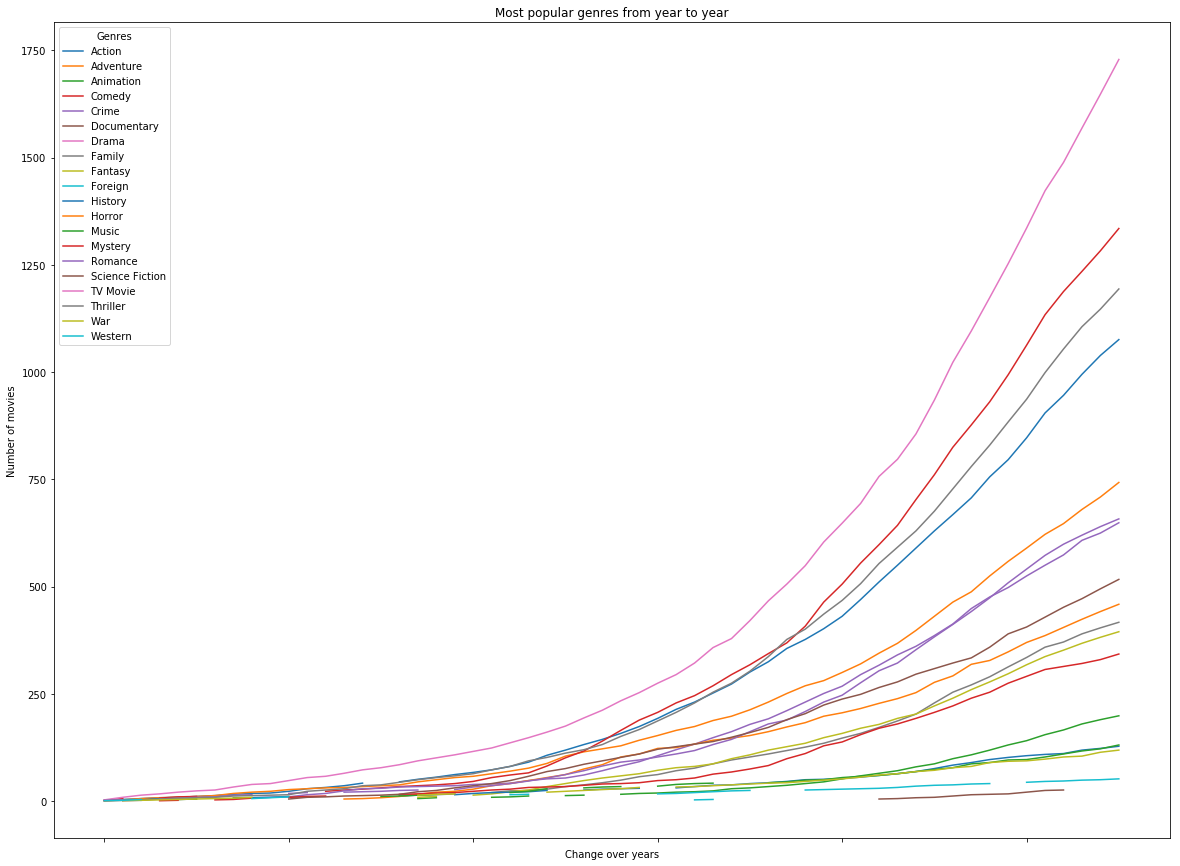

In [51]:
import pylab as pl
df.plot(kind="line" ,  figsize = (20,15));
plt.title("Most popular genres from year to year")
plt.xlabel("Change over years")
plt.ylabel("Number of movies")


It's concluded that almost all genres popularity increasing by time.

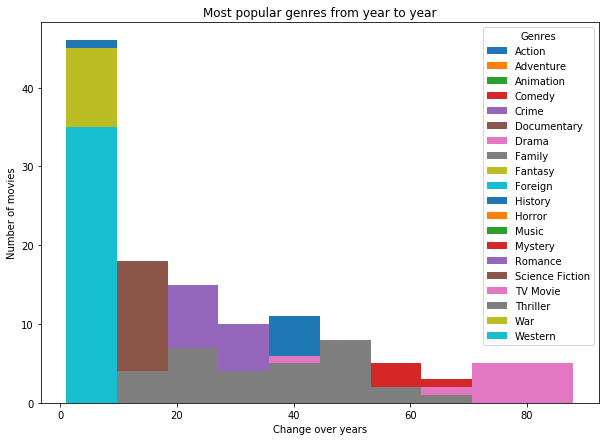

In [49]:
df.plot( kind="hist" , figsize = (10,7));
plt.title("Most popular genres from year to year")
plt.xlabel("Change over years")
plt.ylabel("Number of movies")
df = df.cumsum();
plt.figure();


It's concluded that Some genres were really popular in the past and now their popularity decreased significantly like western movies. 
In contrast, some genres weren't popular and over time they became popular the most like drama.


<a id='conclusions'></a>
## Conclusions

<ul>
<li>This database was really beneficial and rich with info that from it I came to many conclusions. Those conclusions helped me in answering the above question and can do a lot more.
    
<li>limitations: 
    <br>
    I found many columns need to be removed as they are not important for our analysis (as "imdb_id"). so, I dropped them.  
    <br>
    There was one duplicated row need to dropped.  
    <br>
    The dataset contains some rows with null and zero values in some features. And this rows need to be removed.  
    <br>
    There were many columns containing several values, which are seperated by an "|",so I create a function to split them.
    
    


#### Who is the actor with most movies?
Robert De Niro with 52 movies


#### Who is the director with most movies?
Steven Spielberg with 27 movies


#### Who is the actor that makes the most money?
Harrison Ford with 1.428570e+10 dollars


#### Who is the director that makes the most money?
Steven Spielberg with 1.520245e+10 dollars


#### Which genres are most popular?
Drama  
<br>
<li>This database was really beneficial and rich with info that from it I came to many conclusions. Those conclusions helped me in answering the above question and can do a lot more.

<li>From the first question, it's concluded that the No. of the first four actors' movies are relatively higher than the rest.


<li>From the second question, it's concluded that the No. of the first three directors' movies are relatively higher than the rest.

<li>There is a huge difference between the first actor compared to the rest of the actors: The first actor earns a lot more than the other actors. this same conclusion applies too to question four where the first director earns a lot more than the others.

<li>From the last question, it's concluded that Some genres were really popular in the past and now their popularity decreased significantly like western movies. 
In contrast, some genres weren't popular and over time they became popular the most like drama.

</ul>


In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

In [ ]:
!jupyter nbconvert Loan_Data_Exploration_Part2.ipynb --to slides --post serve  --no-input --no-prompt